**Assessment of Building Energy Use in San Francisco Buildings**

In response to the international concern regarding climate change, initiatives have been implemented to incentivize building owners and operators to reduce the energy use of their buildings. The Energy Star score was developed as a way to benchmark building energy use and to establish standards by which buildings can be compared. The primary inputs to the generation of the score include gas and electricity usage, building use (office building, education, restaurant, etc.), and gross square footage.

The score is provided on a scale of 1 to 100, which represents the percentile of buildings that have poorer energy performance than the building being rated. A building is considered high-performing if its energy use is lower than 75 percent of buildings after normalizing for building use, and square footage. Another metric used to characterize building enery use is the energy use intensity (EUI), which is the total annual energy consumption of a building divided by its floor area (units of kBtu/SF-yr). 

For buildings in most cities, obtaining an Energy Star score is voluntary, however, the city of San Francisco passed the Existing Commercial Buildings Energy Performance Ordinance in 2011, which requires annual benchmarking through Energy Star.

**Preliminary Dataset**

The relationship between building Energy Star Score and EUI is shown in the graph below.

Line of Best Fit: y =  110.17 exp( 0.01 x) +  -5.86
       ENERGY_STAR_Score     SiteEUI
count         661.000000  661.000000
mean           71.183056   61.870953
std            26.508914   59.722602
min             1.000000    1.800000
25%            57.000000   32.000000
50%            81.000000   50.900000
75%            91.000000   71.100000
max           100.000000  752.000000


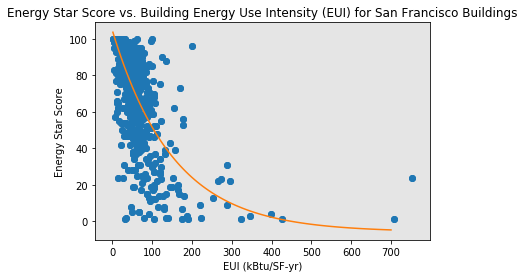

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import pylab
from scipy.optimize import curve_fit

df = pd.read_csv('San_Francisco_Building_Data_No Blanks.csv')
x = df['SiteEUI']
y = df['ENERGY_STAR_Score']

def exponential_func(x, a, b, c):
    return a*np.exp(-b*x)+c

popt, pcov = curve_fit(exponential_func, x, y, p0=(100, 1e-6, 0))
print('Line of Best Fit: y = ',round(popt[0],2),'exp(',round(popt[1],2),'x) + ',round(popt[2],2))
print(df.describe())

xx = np.linspace(1, 700, 100)
yy = exponenial_func(xx, *popt)

plt.plot(x,y,'o', xx, yy)
plt.scatter(x,y)
plt.ylabel('Energy Star Score')
plt.xlabel('EUI (kBtu/SF-yr)')
plt.title('Energy Star Score vs. Building Energy Use Intensity (EUI) for San Francisco Buildings')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()

This graph indicates that as the building EUI decreases, the Energy Star score increases, which is expected because the EUI is used to determine the Energy Star score. One interesting finding from the percentile outputs is that the Energy Star scores for buildings in San Francisco are much higher than the national average and therefore the San Francisco data shows a bias. For example, the Energy Star score at the 50th percentile nationally is 50, but the score at the 50th percentile in San Francisco is actually 81. A possible explanation for this is that San Francisco experiences a much milder climate than most locations in the US and therefore energy the required for heating and cooling is lower.

**Is there a relationship between Energy Star scores and variability in EUIs?**

The scatter plot also shows that the building EUIs converge at higher scores, whereas the low scores show extreme variability. The variability in building EUI is further illustrated in the boxplot on the left below, which shows that all outliers in the dataset occur at high EUIs. Subdividing the data into Energy Star score bins, as is shown in the boxplot graph on the right, shows that for all Energy Star scores, the data is skewed to the right, however, there is greater variability for lower scores.

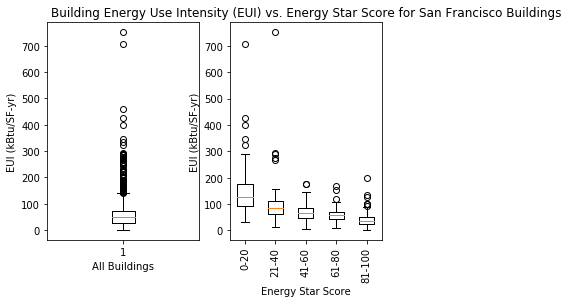

In [104]:
df = pd.read_csv('San_Francisco_Building_Data.csv')
x = df['ENERGY_STAR_Score']
y = df['SiteEUI']

fig = plt.figure()

#cx = fig.add_subplot(131)
#plt.hist(x, bins=10, color='red')
#plt.title('Frequence of Energy Star Scores in San Francisco')
#plt.xlabel('Energy Star Scores')

bx = fig.add_subplot(121)
plt.xlabel('All Buildings')
plt.ylabel('EUI (kBtu/SF-yr)')
bx.boxplot(y)

ax = fig.add_subplot(122)

a = y[x<21]
b = y[(x > 20) & (x <= 40)]
c = y[(x > 40) & (x <= 60)]
d = y[(x > 60) & (x <= 80)]
e = y[(x > 80) & (x <= 100)]

label_names = ['0-20','21-40','41-60','61-80','81-100']
plt.ylabel('EUI (kBtu/SF-yr)')
plt.xlabel('Energy Star Score')
plt.title('Building Energy Use Intensity (EUI) vs. Energy Star Score for San Francisco Buildings')
ax.boxplot([a,b,c,d,e])
ax.set_xticklabels(label_names,rotation=90)
plt.show()

The extreme variability in EUIs for buildings with lower Energy Star scores calls into question why such variability exists.

**Why do some buildings have EUIs greater than 300 kBtu/SF-yr?**

Some buildings have anomalous EUIs that are greater than 300 kBtu/SF-yr. Two potential variables that could explain these outliers are the primary building use and climate. To assess the impact of climate on EUI, the EUI vs building use can be plotted for the three main utility providers in California, as each of these utility providers serve different regions and therefore the buildings represented in the datasets will be subjected to different climates. These utilities are:
1. Pacific Gas and Electric (PG&E) - San Francisco area utility provider. Representative of northern California region.
2. Southern California Edison (SCE) - Los Angeles area utility provider. Representative of middle California region.
3. San Diego Gas and Electric (SDG&E) - San Diego area utility provider. Representative of southern California region.

Graphing building use for multiple climates will give a visual overview of universal trends occurring for each building type, given climate variations.

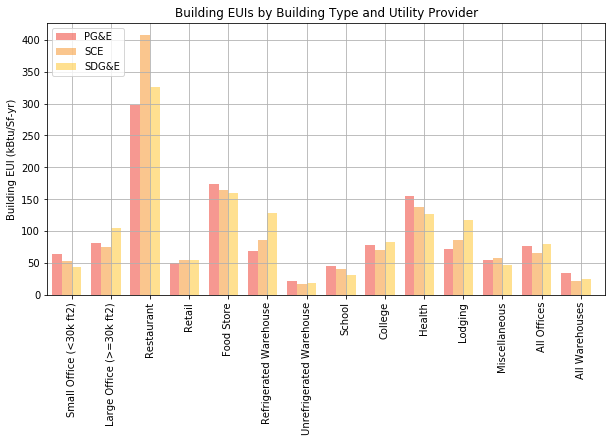

In [6]:
df = pd.read_csv('CaliforniaEUI.csv')
BuildingType = df['BuildingType']
PGE = df['PG&E']
SCE = df['SCE']
SDGE = df['SDG&E']

# Setting the positions and width for the bars
pos = list(range(len(df['PG&E'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with score data
plt.bar(pos,df['PG&E'],width,alpha=0.5,color='#EE3224',label=df['BuildingType'][0])
plt.bar([p + width for p in pos],df['SCE'],width,alpha=0.5,color='#F78F1E',label=df['BuildingType'][1])
plt.bar([p + width*2 for p in pos],df['SDG&E'],width,alpha=0.5,color='#FFC222',label=df['BuildingType'][2])

# Plot attributes
ax.set_ylabel('Building EUI (kBtu/Sf-yr)')
ax.set_title('Building EUIs by Building Type and Utility Provider')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['BuildingType'],rotation=90)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['SCE']+20)] )
plt.legend(['PG&E', 'SCE', 'SDG&E'], loc='upper left')
plt.grid()
plt.show()

The grouped bar chart above indicates that restaurants have by far the greatest energy use intensity of all the building types regardless of location, as the minimum EUI of all three utilities in the restaurant category is the PG&E average at 300 kBtu/SF-yr. In comparison, the next largest EUI group is grocery stores (shown as "Food Store"), in which PG&E peaked at 175 kBtu/SF-yr. 

While a visual assessment seems to indicate that restaurants have an exceptionally high EUI regardless of climate, a t-test analysis will indicate whether these anomalous EUIs are occurring randomly or due to actual differences in building use. Unfortunately, the dataset did not report both the EUI and building type on a building-by-building basis and therefore the standard deviation of the EUI for restaurants is not available. To perform a full t-test analysis, it would be necessary to obtain the full dataset (to include both the EUI and building type on a building-by-building basis), which would allow the mean and standard deviation of resetaurant EUIs to be determined. Additionally, given that there are only 6 EUIs that are greater than 300 kBtu/SF-yr, the small sample size may call the validity of a t-test assessment into question.

In the absence of the data necessary to perform a t-test assessment, let's assume that the high restaurant EUIs can be attributed to building operations that are unique to restaurants.

**Why do restaurants have a greater EUI as compared to other building types?**

Given the consistently high energy use for restaurants as compared other building types regardless of climate, there must be some building operation that is unique to restaurants which can explain this anomaly. Potential explanations include longer operating hours or the higher cooling loads as a result of the heat generated by cooking and/or high occupancy.

A plot of the end use breakdown for each building type can provide insight as to why restaurants have exceptionally high EUIs by highlighting building operations that are unique to restaurants.

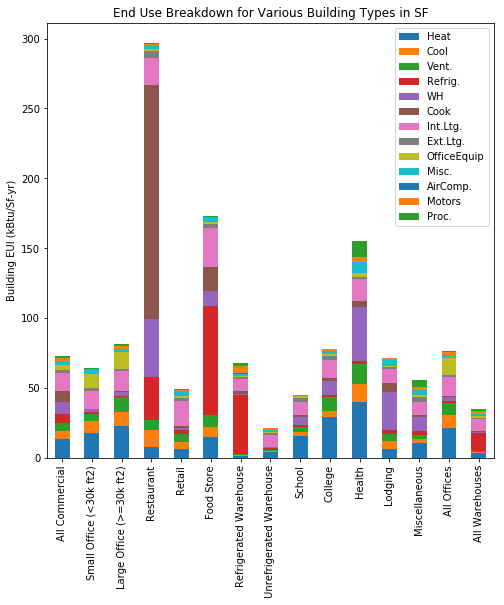

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('PGE_EndUseBreakdown.csv')
BuildingType = df['BuildingType']
ax = df.drop(['Total'],axis=1).plot(kind='bar',stacked=True,rot=1,figsize=(8,8),title='End Use Breakdown for Various Building Types in SF')
ax.set_xticklabels(BuildingType,rotation=90)
ax.set_ylabel('Building EUI (kBtu/Sf-yr)')
plt.show()

The above graph shows that predictably, the energy used for cooking is much greater for restaurants than any other building and accounts for more than half of restaurant energy use. This finding confirms the educated guess that there is a building operation unique to restaurants which is responsible for the anomalous energy use.

**Further Research**

Future research could be used to address conjectures introduced in the previous sections. Specifically:
1. What is the relationship between climate and EUI? Perhaps assessing building performance in climates that are vastly different from California could explain the bias in San Francisco building EUIs. This analysis could be performed by overlaying histograms of EUIs for two cities or comparing the end use breakdown for buildings of similar uses in different cities by using stacked bar graphs.
2. How does diversity in building operating schedules impact the variability in energy use of a city? Comparing heat maps of individual buildings or building types to the energy requirements of an entire city may shed light on potential opportunities for grid stabilization, such that minimal power plants would have to be operated at any given time. The benefit of minimizing power plant operation is that the primary power plants are assumed to be more efficient than standby power plants.

**Sources**

1. San Francisco Benchmarking Report 
    http://uli.org/wp-content/uploads/ULI-Documents/SFenergybenchmarkingreport.pdf

2. California Commercial End Use Survey
http://www.energy.ca.gov/2006publications/CEC-400-2006-005/CEC-400-2006-005.PDF

3. Creating Grouped Bar Plots
https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html

4. Creating Stacked Bar Charts
https://chrisalbon.com/python/matplotlib_stacked_bar_plot.html

5. How the 1-100 Energy Star score is calculated
https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/how-1-100